In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [3]:
ls data

signnames.csv  test.p  train.p


In [4]:
train = pd.read_pickle('data/train.p')
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [5]:
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

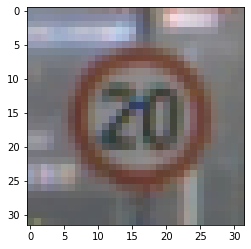

In [6]:
plt.imshow( X_train[10000] )

In [7]:
signs = pd.read_csv('data/signnames.csv')
signs.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [8]:
dict_signs = signs.to_dict()['b']
dict_signs[30]

'Beware of ice/snow'

In [9]:
# ilosc konkretnego znaku
X_train[ y_train == 20 ].shape

(300, 32, 32, 3)

In [10]:
for id_sign in dict_signs.keys():
  
  given_signs = X_train[ y_train == id_sign ]

  plt.figure(figsize=(15, 5))
  for i in range(9):
    plt.subplot('19{0}'.format(i+1))
    plt.imshow( given_signs[i] )
    
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

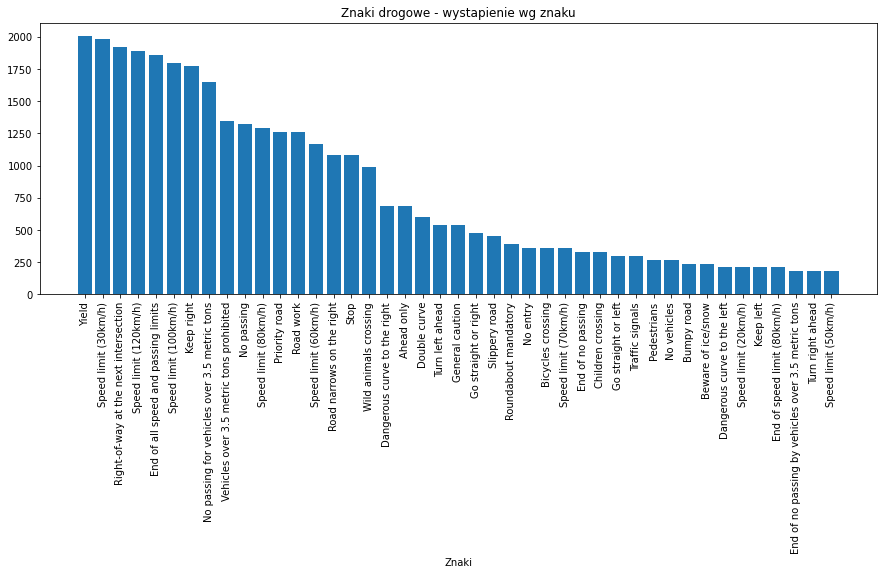

In [11]:
cnt = Counter(y_train).most_common()

id_labels, cnt_labels = zip(*cnt)
ids = range(len(id_labels))

plt.figure(figsize=(15, 5))
plt.bar(ids, cnt_labels)

plt.xlabel('Znaki')
labels = [dict_signs[ id_labels[id_] ] for id_ in id_labels]
plt.xticks(ids, labels, rotation='vertical')

plt.title('Znaki drogowe - wystapienie wg znaku')
plt.show()